# Wine Data Set

 Using chemical analysis determine the origin of wines <br><br><br>http://archive.ics.uci.edu/ml/datasets/Wine


### Attributes
0) Class <br>
1) Alcohol <br>
2) Malic acid <br>
3) Ash <br>
4) Alcalinity of ash <br>
5) Magnesium <br>
6) Total phenols <br>
7) Flavanoids <br>
8) Nonflavanoid phenols <br>
9) Proanthocyanins <br>
10)Color intensity <br>
11)Hue <br>
12)OD280/OD315 of diluted wines <br>
13)Proline <br>

## Importando os modulos

In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn import cross_validation
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.grid_search import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from pandas import read_csv
from pandas.tools.plotting import scatter_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Carregando os Dados

In [3]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
colunas = ['Class', 'Alcohol', 'Malic acid','Ash', 'Alcalinity of ash', 'Magnesium','Total phenols','Flavanoids','Nonflavanoid phenols','Proanthocyanins','Color intensity','Hue', 'OD280/OD315 of diluted wines', 'Proline']
dados = read_csv(url, names = colunas)

## Sumarizando os Dados

### Estatística Descritiva

In [4]:
# Shape
print(dados.shape)

(178, 14)


In [5]:
# Tipos de Dados
print(dados.dtypes)

Class                             int64
Alcohol                         float64
Malic acid                      float64
Ash                             float64
Alcalinity of ash               float64
Magnesium                         int64
Total phenols                   float64
Flavanoids                      float64
Nonflavanoid phenols            float64
Proanthocyanins                 float64
Color intensity                 float64
Hue                             float64
OD280/OD315 of diluted wines    float64
Proline                           int64
dtype: object


In [7]:
# Head 
dados.head(5)

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [8]:
# Descrição dos dados
dados.describe()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


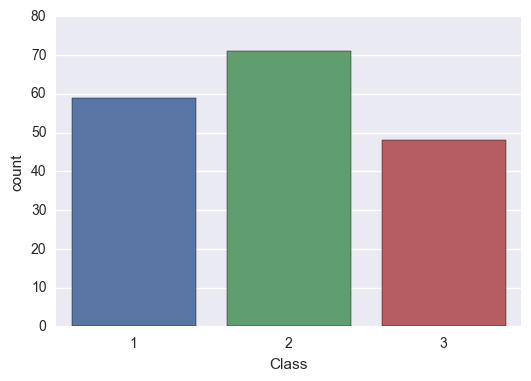

In [10]:
# Distribuição das classes
sns.countplot(dados['Class'], label = "Contagem")

## Visualizando os Dados

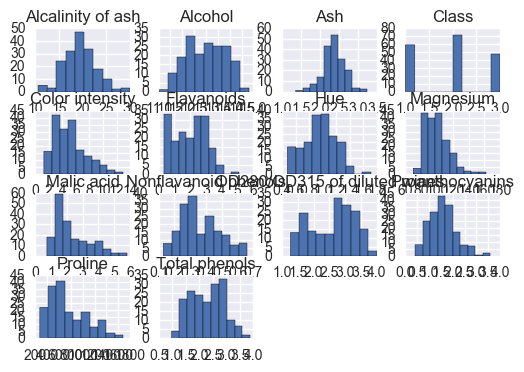

In [11]:
# Histograma
dados.hist()
plt.show()

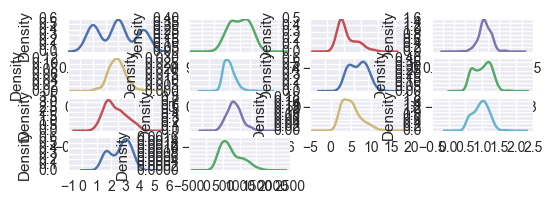

In [21]:
# Density Plots
dados.plot(kind = 'density', subplots = True, layout = (8,4), sharex = False, legend = False)
plt.show()

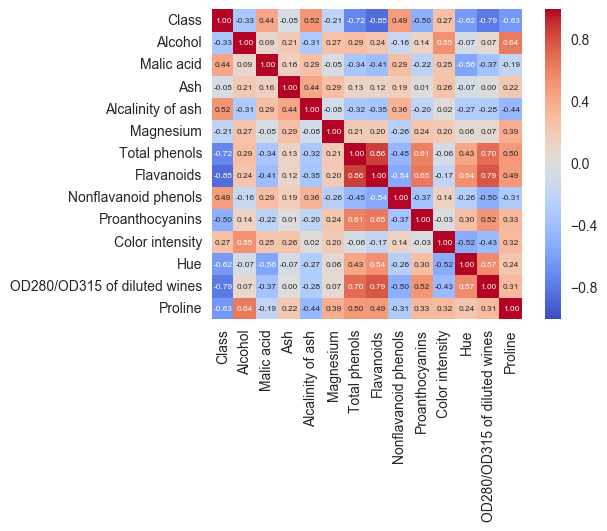

In [39]:
plt.figure()
sns.heatmap(dados.corr(), cbar = True,  square = True,
            annot=True, fmt= '.2f',annot_kws={'size': 6},
            cmap= 'coolwarm') 

## Preparação dos Dados

In [43]:
# Separação em Dados de Treino e Teste
valores_dados = dados.values

# Variaveis Independentes
X = valores_dados[:, 1:14]

# Variavel Dependente
Y = valores_dados[:, 0]

# Conjunto de dados de treino e de teste
X_treino, X_teste, Y_treino, Y_teste = cross_validation.train_test_split(X, Y,
                                                                        test_size = 0.20,
                                                                        random_state = 7)

## Avaliação do Algoritmo

In [51]:
# Métrica: Acurancia (Quanto maior o valor, melhor)
modelos = []
modelos.append(('LR', LogisticRegression()))
modelos.append(('LDA', LinearDiscriminantAnalysis()))
modelos.append(('KNN', KNeighborsClassifier()))
modelos.append(('CART', DecisionTreeClassifier()))
modelos.append(('NB', GaussianNB()))
modelos.append(('SVM', SVC()))
resultados = []
nomes = []

# Percorrendo cada um dos modelos
for nome, modelo in modelos:
    kfold = cross_validation.KFold(n = len(X_treino), n_folds = 10, random_state = 7)
    cross_val_result = cross_validation.cross_val_score(modelo, 
                                                        X_treino,
                                                        Y_treino, 
                                                        cv = kfold,
                                                       scoring = 'accuracy')
    resultados.append(cross_val_result)
    nomes.append(nome)
    texto = "%s: %f (%f)" % (nome, cross_val_result.mean(), cross_val_result.std())
    print(texto)

LR: 0.950476 (0.055623)
LDA: 0.992857 (0.021429)
KNN: 0.726190 (0.076968)
CART: 0.886190 (0.091707)
NB: 0.971429 (0.034993)
SVM: 0.415238 (0.131894)


Claramente houve um overfitting devido a não padronização dos dados.

In [52]:
# Aplicando Padronização ao conjunto de dados
# Os dados serão transformados de modo que estejam com uma distribuição normal,
# com média igual a zero e desvio padrão igual a 1.

pipelines = []
pipelines.append(('Scaled-LR', Pipeline([('Scaler', StandardScaler()),('LR', LogisticRegression())])))
pipelines.append(('Scaled-LDA', Pipeline([('Scaler', StandardScaler()),('LDA', LinearDiscriminantAnalysis())])))
pipelines.append(('Scaled-KNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])))
pipelines.append(('Scaled-CART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier())])))
pipelines.append(('Scaled-NB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])))
pipelines.append(('Scaled-SVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC())])))
resultados = []
nomes = []

# Percorrendo cada um dos modelos
for nome, modelo in pipelines:
    kfold = cross_validation.KFold(n = len(X_treino), n_folds = 10, random_state = 7)
    cross_val_result = cross_validation.cross_val_score(modelo, 
                                                     X_treino, 
                                                     Y_treino, 
                                                     cv = kfold, 
                                                     scoring = 'accuracy')
    resultados.append(cross_val_result)
    nomes.append(nome)
    texto = "%s: %f (%f)" % (nome, cross_val_result.mean(), cross_val_result.std())
    print(texto)

Scaled-LR: 0.992857 (0.021429)
Scaled-LDA: 0.992857 (0.021429)
Scaled-KNN: 0.958095 (0.045416)
Scaled-CART: 0.879048 (0.072130)
Scaled-NB: 0.971429 (0.034993)
Scaled-SVM: 0.971905 (0.034434)
